# <font color="red">BART Project</font>

**In this project I will answer questions and show statistics about bart trips** 

# Data Analytics Questions
1. Which BART station is the busiest? 
2. What is the least popular BART route? 
3. When is the best time to go to SF from Berkeley if you want to find a seat? 
4. Which day of the week is the busiest? 
5. How many people take the BART late at night?

# Data Science Questions
1. Question A: Compute the straight line distance between every station 
2. Question B: Build a model that can predicted the number of people commuting to work by 

  
![image](station.png)   

In [124]:
abbr = pd.read_clipboard() # http://api.bart.gov/docs/overview/abbrev.aspx
abbr

,Abbr,Station Name
0,12th,12th St. Oakland City Center
1,16th,16th St. Mission (SF)
2,19th,19th St. Oakland
3,24th,24th St. Mission (SF)
4,ashb,Ashby (Berkeley)
5,antc,Antioch
6,balb,Balboa Park (SF)
7,bayf,Bay Fair (San Leandro)
8,bery,Berryessa
9,cast,Castro Valley


## Bart between any 2 stations: 
1. How would you approach that?
2. What additional data would you need 
3. How would you want the city or Bart officials to use your data? 

# Data Setup & EDA

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df2016 = pd.read_csv('Ridership/date-hour-soo-dest-2016.csv')
df2017 = pd.read_csv('Ridership/date-hour-soo-dest-2017.csv')

In [3]:
merged_df=pd.concat([df2016,df2017],ignore_index=True)

In [4]:
merged_df

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2
...,...,...,...,...,...
19947752,2018-01-01,2,WOAK,POWL,3
19947753,2018-01-01,2,WOAK,RICH,1
19947754,2018-01-01,2,WOAK,SBRN,1
19947755,2018-01-01,2,WOAK,SHAY,2


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19947757 entries, 0 to 19947756
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 760.9+ MB


## Adding date columns

In [6]:
merged_df["Date"]=pd.to_datetime(merged_df['Date'])

merged_df["Day"]=merged_df["Date"].dt.dayofweek
merged_df["Month"]=merged_df["Date"].dt.month
merged_df["Year"]=merged_df["Date"].dt.year


merged_df['WeekDay']=merged_df['Date'].dt.day_name()
merged_df['Month_Name']=merged_df['Date'].dt.month_name()

merged_df.drop("Date",axis=1,inplace=True)

In [7]:
merged_df

,Hour,Origin Station,Destination Station,Trip Count,Day,Month,Year,WeekDay,Month_Name
0,0,12TH,12TH,1,4,1,2016,Friday,January
1,0,12TH,16TH,1,4,1,2016,Friday,January
2,0,12TH,24TH,4,4,1,2016,Friday,January
3,0,12TH,ASHB,4,4,1,2016,Friday,January
4,0,12TH,BALB,2,4,1,2016,Friday,January
...,...,...,...,...,...,...,...,...,...
19947752,2,WOAK,POWL,3,0,1,2018,Monday,January
19947753,2,WOAK,RICH,1,0,1,2018,Monday,January
19947754,2,WOAK,SBRN,1,0,1,2018,Monday,January
19947755,2,WOAK,SHAY,2,0,1,2018,Monday,January


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19947757 entries, 0 to 19947756
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Hour                 int64 
 1   Origin Station       object
 2   Destination Station  object
 3   Trip Count           int64 
 4   Day                  int64 
 5   Month                int64 
 6   Year                 int64 
 7   WeekDay              object
 8   Month_Name           object
dtypes: int64(5), object(4)
memory usage: 1.3+ GB


In [9]:
merged_df.describe()

,Hour,Trip Count,Day,Month,Year
count,1.994776e+07,1.994776e+07,1.994776e+07,1.994776e+07,1.994776e+07
mean,1.363457e+01,1.258686e+01,2.847325e+00,6.524663e+00,2.016500e+03
std,5.668834e+00,3.304694e+01,1.929236e+00,3.431580e+00,5.002022e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03
25%,9.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,2.016000e+03
50%,1.400000e+01,4.000000e+00,3.000000e+00,7.000000e+00,2.017000e+03
75%,1.800000e+01,1.000000e+01,4.000000e+00,1.000000e+01,2.017000e+03
max,2.300000e+01,1.826000e+03,6.000000e+00,1.200000e+01,2.018000e+03


In [10]:
#merged_df.to_csv('Merged1617.csv')

In [220]:
merged_df = pd.read_csv('Merged1617.csv').drop('Unnamed: 0',axis=1)

# Data Analytic Questions

In [221]:
drop_condition = merged_df[merged_df['Origin Station']==merged_df['Destination Station']].index # Dropping duplicates

In [222]:
merged_df.drop(drop_condition, inplace=True)

**I dropped columns which have same value in origin station and destination station**

### Adding a new column consists origin station name and destination name

In [223]:
new_data = pd.DataFrame()

In [224]:
merged_df['origin+destination'] =merged_df['Origin Station'] + merged_df['Destination Station']

In [225]:
new_data['Total Trip'] = merged_df.groupby('origin+destination')['Trip Count'].sum().sort_values(ascending=False)

## 1. Which BART station is the busiest? 

In [226]:
new_data['Total Trip'][:10]

origin+destination
POWLBALB    1609859
BALBMONT    1491013
BALBPOWL    1370588
DUBLEMBR    1351861
POWL24TH    1336889
24THMONT    1318214
WOAKEMBR    1193579
24THPOWL    1156501
PHILEMBR    1141056
EMBRDUBL    1137424
Name: Total Trip, dtype: int64

**RESULT : 	Powell St. TO Balboa Park**

## 2. What is the least popular BART route? 

In [227]:
new_data['Total Trip'][-3:-1]

origin+destination
WARMCOLM    319
MLBRWARM    302
Name: Total Trip, dtype: int64

**RESULT : Warm Springs/South Fremont TO Colma**

## 3. When is the best time to go to SF from Berkeley if you want to find a seat?

In [228]:
merged_df.groupby('origin+destination')['Hour'].sum()

origin+destination
12TH16TH    189641
12TH19TH    137022
12TH24TH    190465
12THASHB    183553
12THBALB    175572
             ...  
WOAKSSAN     75833
WOAKUCTY     69190
WOAKWARM     22703
WOAKWCRK     89856
WOAKWDUB     67813
Name: Hour, Length: 2070, dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='count'>

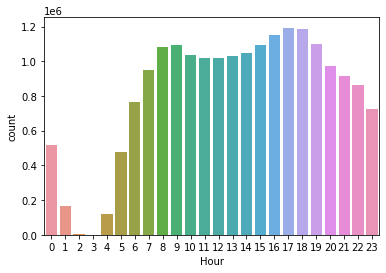

In [229]:
sns.countplot(merged_df['Hour']) # All stations 

<AxesSubplot:xlabel='Hour', ylabel='count'>

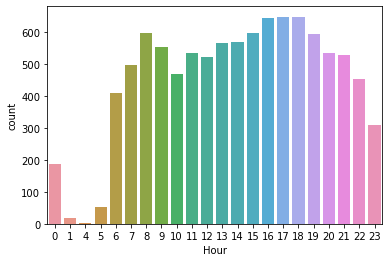

In [230]:
sns.countplot(merged_df[merged_df['origin+destination']=='BALBASHB']['Hour'])  # San Frascico to Berkeley

**RESULT :** Best time for going SF from Berkeley is 4 A.M

# 4. Which day of the week is the busiest?

<AxesSubplot:xlabel='WeekDay', ylabel='count'>

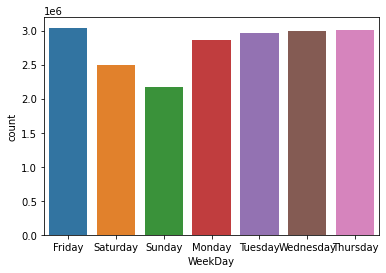

In [34]:
sns.countplot(merged_df['WeekDay'])

# 5. How many people take the BART late at night?

In [35]:
merged_df[(merged_df['Hour']>0) & (merged_df['Hour']<6)]['Trip Count'].sum()

3550972

**Result :** 3550972 , If we want to evaluate actual result we have to multiply this value by how many people can fit the train

# <font color="red">DATA Science Questions</font>

**We must do some procces about scrapping data from Internet before answering questions**

## Scrapping DATA From BART API

**We need this data because we have to evaluate distance betweeen stations**

## Latitude & Longitude

**Using request to take json data from BART API**

In [174]:
from bs4 import BeautifulSoup
import requests
import json

In [175]:
url="http://api.bart.gov/api/stn.aspx?cmd=stns&key=MW9S-E7SL-26DU-VV8V&json=y"
response=requests.get(url).json()

In [176]:
stations = response['root']['stations']['station']
gtfs_latitude = []
gtfs_longitude = []
abbr = []
for i in stations:
    gtfs_latitude.append(i['gtfs_latitude'])
    gtfs_longitude.append(i['gtfs_longitude'])
    abbr.append(i['abbr'])

dictionary = {'Abbreviation':abbr, 'Latitude':gtfs_latitude, 'Longitude':gtfs_longitude}
df = pd.DataFrame(dictionary)

In [177]:
df

,Abbreviation,Latitude,Longitude
0,12TH,37.803768,-122.271450
1,16TH,37.765062,-122.419694
2,19TH,37.808350,-122.268602
3,24TH,37.752470,-122.418143
4,ANTC,37.995388,-121.780420
5,ASHB,37.852803,-122.270062
6,BALB,37.721585,-122.447506
7,BAYF,37.696924,-122.126514
8,BERY,37.368473,-121.874681
9,CAST,37.690746,-122.075602


# Evaluate Distance Between Stations

**We have to use selenium in this section**

## Subcombinations of routes

**Yes you can ask me why did you find subcombinations of routes, because we have to find every distance between stations and you may realize if we evalute the distance of 12TH to 16 TH there is no needed to evaluate vice-versa**

In [178]:
import itertools

In [179]:
routes = pd.DataFrame()

routes['permutations']=list(itertools.permutations(df.values,2))
routes['permutations']

0       ([12TH, 37.803768, -122.271450], [16TH, 37.765...
1       ([12TH, 37.803768, -122.271450], [19TH, 37.808...
2       ([12TH, 37.803768, -122.271450], [24TH, 37.752...
3       ([12TH, 37.803768, -122.271450], [ANTC, 37.995...
4       ([12TH, 37.803768, -122.271450], [ASHB, 37.852...
                              ...                        
2445    ([WOAK, 37.804872, -122.295140], [SSAN, 37.664...
2446    ([WOAK, 37.804872, -122.295140], [UCTY, 37.590...
2447    ([WOAK, 37.804872, -122.295140], [WCRK, 37.905...
2448    ([WOAK, 37.804872, -122.295140], [WARM, 37.502...
2449    ([WOAK, 37.804872, -122.295140], [WDUB, 37.699...
Name: permutations, Length: 2450, dtype: object

In [180]:
liste=list()
for i in routes['permutations']:
    liste.append(i[0][0]+i[1][0])

routes['route'] = liste

In [181]:
routes['route']

0       12TH16TH
1       12TH19TH
2       12TH24TH
3       12THANTC
4       12THASHB
          ...   
2445    WOAKSSAN
2446    WOAKUCTY
2447    WOAKWCRK
2448    WOAKWARM
2449    WOAKWDUB
Name: route, Length: 2450, dtype: object

In [182]:
routes

,permutations,route
0,"([12TH, 37.803768, -122.271450], [16TH, 37.765...",12TH16TH
1,"([12TH, 37.803768, -122.271450], [19TH, 37.808...",12TH19TH
2,"([12TH, 37.803768, -122.271450], [24TH, 37.752...",12TH24TH
3,"([12TH, 37.803768, -122.271450], [ANTC, 37.995...",12THANTC
4,"([12TH, 37.803768, -122.271450], [ASHB, 37.852...",12THASHB
...,...,...
2445,"([WOAK, 37.804872, -122.295140], [SSAN, 37.664...",WOAKSSAN
2446,"([WOAK, 37.804872, -122.295140], [UCTY, 37.590...",WOAKUCTY
2447,"([WOAK, 37.804872, -122.295140], [WCRK, 37.905...",WOAKWCRK
2448,"([WOAK, 37.804872, -122.295140], [WARM, 37.502...",WOAKWARM


# Evaluating Distance between stations by using website

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [50]:
driver = webdriver.Chrome(r"C:\Users\MONSTERHAN\Documents\DataScience-Homeworks\BART Project\Selenium\chromedriver.exe")
driver.get("https://www.tarimziraat.com/tarimsal_harita_uygulamalari/haritadan_iki_nokta_arasi_olcumu.php")
time.sleep(2)

distance= list()

for i in routes['permutations']:
    
    enlem1=driver.find_element_by_xpath('//*[@id="enlem1"]').clear()
    enlem2=driver.find_element_by_xpath('//*[@id="enlem2"]').clear()
    boylam1=driver.find_element_by_xpath('//*[@id="boylam1"]').clear()
    boylam2=driver.find_element_by_xpath('//*[@id="boylam2"]').clear()
    
    enlem1=driver.find_element_by_xpath('//*[@id="enlem1"]').send_keys(i[0][1])
    enlem2=driver.find_element_by_xpath('//*[@id="enlem2"]').send_keys(i[1][1])
    boylam1=driver.find_element_by_xpath('//*[@id="boylam1"]').send_keys(i[0][2])
    boylam2=driver.find_element_by_xpath('//*[@id="boylam2"]').send_keys(i[1][2])
    buton1=driver.find_element_by_xpath('//*[@id="buton2"]')
    buton1.click()
    sonuc = driver.find_element_by_xpath('/html/body/div[3]/div[1]/div[5]/b')
    distance.append(sonuc.text)
routes['distances'] = distance    

In [51]:
routes

,permutations,route,distances
0,"([12TH, 37.803768, -122.271450], [16TH, 37.765...",12TH16TH,13.736
1,"([12TH, 37.803768, -122.271450], [19TH, 37.808...",12TH19TH,568
2,"([12TH, 37.803768, -122.271450], [24TH, 37.752...",12TH24TH,14.114
3,"([12TH, 37.803768, -122.271450], [ANTC, 37.995...",12THANTC,48.119
4,"([12TH, 37.803768, -122.271450], [ASHB, 37.852...",12THASHB,5.460
...,...,...,...
2445,"([WOAK, 37.804872, -122.295140], [SSAN, 37.664...",WOAKSSAN,20.414
2446,"([WOAK, 37.804872, -122.295140], [UCTY, 37.590...",WOAKUCTY,34.166
2447,"([WOAK, 37.804872, -122.295140], [WCRK, 37.905...",WOAKWCRK,22.930
2448,"([WOAK, 37.804872, -122.295140], [WARM, 37.502...",WOAKWARM,46.032


In [52]:
#routes.to_csv('2450Routes.csv')

In [184]:
routes = pd.read_csv('2450Routes.csv').drop('Unnamed: 0',axis=1)

In [185]:
routes

,permutations,route,distances
0,"(array(['12TH', '37.803768', '-122.271450'], d...",12TH16TH,13.736
1,"(array(['12TH', '37.803768', '-122.271450'], d...",12TH19TH,568.000
2,"(array(['12TH', '37.803768', '-122.271450'], d...",12TH24TH,14.114
3,"(array(['12TH', '37.803768', '-122.271450'], d...",12THANTC,48.119
4,"(array(['12TH', '37.803768', '-122.271450'], d...",12THASHB,5.460
...,...,...,...
2445,"(array(['WOAK', '37.804872', '-122.295140'], d...",WOAKSSAN,20.414
2446,"(array(['WOAK', '37.804872', '-122.295140'], d...",WOAKUCTY,34.166
2447,"(array(['WOAK', '37.804872', '-122.295140'], d...",WOAKWCRK,22.930
2448,"(array(['WOAK', '37.804872', '-122.295140'], d...",WOAKWARM,46.032


# Question A: Compute the straight line distance between every station 

In [186]:
routes[['route','distances']] # distances written in meters

,route,distances
0,12TH16TH,13.736
1,12TH19TH,568.000
2,12TH24TH,14.114
3,12THANTC,48.119
4,12THASHB,5.460
...,...,...
2445,WOAKSSAN,20.414
2446,WOAKUCTY,34.166
2447,WOAKWCRK,22.930
2448,WOAKWARM,46.032


# Question B: Build a model that can predicted the number of people commuting to work by Bart between any 2 stations: 

**Well, I have no idea how many people fits to BART train, I will assume 200 to one BART train.**

In [187]:
merged_df

,Hour,Origin Station,Destination Station,Trip Count,Day,Month,Year,WeekDay,Month_Name,origin+destination
1,0,12TH,16TH,1,4,1,2016,Friday,January,12TH16TH
2,0,12TH,24TH,4,4,1,2016,Friday,January,12TH24TH
3,0,12TH,ASHB,4,4,1,2016,Friday,January,12THASHB
4,0,12TH,BALB,2,4,1,2016,Friday,January,12THBALB
5,0,12TH,BAYF,2,4,1,2016,Friday,January,12THBAYF
...,...,...,...,...,...,...,...,...,...,...
19947751,2,WOAK,PITT,1,0,1,2018,Monday,January,WOAKPITT
19947752,2,WOAK,POWL,3,0,1,2018,Monday,January,WOAKPOWL
19947753,2,WOAK,RICH,1,0,1,2018,Monday,January,WOAKRICH
19947754,2,WOAK,SBRN,1,0,1,2018,Monday,January,WOAKSBRN


In [188]:
ML = pd.DataFrame()

In [189]:
ML = merged_df.groupby('origin+destination')['Trip Count'].sum()

In [190]:
ML = ML.reset_index()

In [191]:
ML['MaximumHour'] = list(merged_df.groupby('origin+destination')['Hour'].median())

In [205]:
ML

,origin+destination,Trip Count,MaximumHour,distances
0,12TH16TH,193527,14.0,NaN
1,12TH19TH,39235,14.0,NaN
2,12TH24TH,170715,14.0,NaN
3,12THASHB,156710,14.0,NaN
4,12THBALB,85111,14.0,NaN
...,...,...,...,...
2065,WOAKSSAN,10567,13.0,NaN
2066,WOAKUCTY,7583,14.0,NaN
2067,WOAKWARM,2768,12.0,NaN
2068,WOAKWCRK,12526,13.0,NaN


In [206]:
#routes['route']

In [207]:
#routes[routes['route']=='12TH16TH']['distances']

In [208]:
templist =list()
for i in ML['origin+destination']:
    templist.append(routes[routes['route']==i]['distances'])

In [209]:
ML['distances'] = templist

In [210]:
ML['distances']

0          0    13.736
Name: distances, dtype: float64
1           1    568.0
Name: distances, dtype: float64
2          2    14.114
Name: distances, dtype: float64
3            4    5.46
Name: distances, dtype: float64
4          5    17.993
Name: distances, dtype: float64
                             ...                      
2065    2445    20.414
Name: distances, dtype: float64
2066    2446    34.166
Name: distances, dtype: float64
2067    2448    46.032
Name: distances, dtype: float64
2068     2447    22.93
Name: distances, dtype: float64
2069    2449    34.348
Name: distances, dtype: float64
Name: distances, Length: 2070, dtype: object

In [211]:
newlist = [str(x)[5:14].strip().replace(".","") for x in ML['distances']]
newlist
ML['distances'] = newlist
#L['distances'] = ML['distances'].str.extract('(\d+)')

In [212]:
ML['distances'] = ML['distances'].str.extract('(\d+)')

In [213]:
ML['distances'] = ML['distances'].astype('int64')

In [214]:
ML

,origin+destination,Trip Count,MaximumHour,distances
0,12TH16TH,193527,14.0,13736
1,12TH19TH,39235,14.0,5680
2,12TH24TH,170715,14.0,14114
3,12THASHB,156710,14.0,546
4,12THBALB,85111,14.0,17993
...,...,...,...,...
2065,WOAKSSAN,10567,13.0,20414
2066,WOAKUCTY,7583,14.0,34166
2067,WOAKWARM,2768,12.0,46032
2068,WOAKWCRK,12526,13.0,2293


## Data Preparing for Modelling

In [215]:
X=ML[['MaximumHour','Trip Count','distances']]

In [216]:
X

,MaximumHour,Trip Count,distances
0,14.0,193527,13736
1,14.0,39235,5680
2,14.0,170715,14114
3,14.0,156710,546
4,14.0,85111,17993
...,...,...,...
2065,13.0,10567,20414
2066,14.0,7583,34166
2067,12.0,2768,46032
2068,13.0,12526,2293


In [217]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MaximumHour  2070 non-null   float64
 1   Trip Count   2070 non-null   int64  
 2   distances    2070 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 48.6 KB


In [218]:
y = ML['Trip Count']

## Modelling

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [159]:
def algo_test(x, y):
    
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)
    
    algos = [L, E, R, Lass, ETR, GBR, XGBC]
    algo_names= ['Linear', 'ElasticNet', 'Ridge', 'Lasso', 'Extra Tree', 'Gradient Boosting', 'XGBRegressor']
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns = ['R_Squared', 'RMSE', 'MAE'],
                           index = algo_names)
    
    for algo in algos:
        algo.fit(X_train, y_train)
        algo.predict(X_test)
        
        r_squared.append(r2_score(y_test, algo.predict(X_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(X_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(X_test)))
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values('R_Squared', ascending=False)

In [160]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MaximumHour  2070 non-null   float64
 1   Trip Count   2070 non-null   int64  
 2   distances    2070 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 48.6 KB


In [161]:
algo_test(X, y)

,R_Squared,RMSE,MAE
Linear,1.000000,1.628901e-10,9.302714e-11
ElasticNet,1.000000,1.315446e-03,8.049985e-04
Ridge,1.000000,3.784918e-09,2.321768e-09
Lasso,1.000000,3.719781e-02,2.276379e-02
Gradient Boosting,0.999189,6.641831e+03,1.482497e+03
Extra Tree,0.999179,6.680809e+03,1.189630e+03
XGBRegressor,0.999164,6.743137e+03,1.292378e+03


## Creating a Neural Network Model 

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [164]:
X=scaler.fit_transform(X) # Scaling to between 0 - 1


In [165]:
pd.DataFrame(X) # We are transforming the X to dataframe because MinMaxScaler does changing the shape of dataframe

,0,1,2
0,0.6,0.120067,0.225656
1,0.6,0.024209,0.092721
2,0.6,0.105895,0.231894
3,0.6,0.097194,0.008003
4,0.6,0.052711,0.295903
...,...,...,...
2065,0.5,0.006399,0.335853
2066,0.6,0.004545,0.562779
2067,0.4,0.001553,0.758585
2068,0.5,0.007616,0.036831


In [166]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [167]:
model=Sequential()
model.add(Dense(81, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [168]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=10, epochs=15, verbose=1)


Epoch 1/15
166/166 [==============================] - 2s 5ms/step - loss: 52717194209.3413 - val_loss: 74359701504.0000
Epoch 2/15
166/166 [==============================] - 0s 1ms/step - loss: 42227103106.2994 - val_loss: 58964504576.0000
Epoch 3/15
166/166 [==============================] - 0s 1ms/step - loss: 37218140120.1437 - val_loss: 51783331840.0000
Epoch 4/15
166/166 [==============================] - 0s 1ms/step - loss: 37113624355.2575 - val_loss: 50330361856.0000
Epoch 5/15
166/166 [==============================] - 0s 1ms/step - loss: 29951319395.6407 - val_loss: 47871438848.0000
Epoch 6/15
166/166 [==============================] - 0s 1ms/step - loss: 30418267090.0120 - val_loss: 45627957248.0000
Epoch 7/15
166/166 [==============================] - 0s 1ms/step - loss: 31094224540.3593 - val_loss: 43014840320.0000
Epoch 8/15
166/166 [==============================] - 0s 1ms/step - loss: 27839676146.2036 - val_loss: 38655602688.0000
Epoch 9/15
166/166 [====================

In [169]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 81)                324       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3280      
_________________________________________________________________
dense_2 (Dense)              (None, 27)                1107      
_________________________________________________________________
dense_3 (Dense)              (None, 19)                532       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 100       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4

<AxesSubplot:>

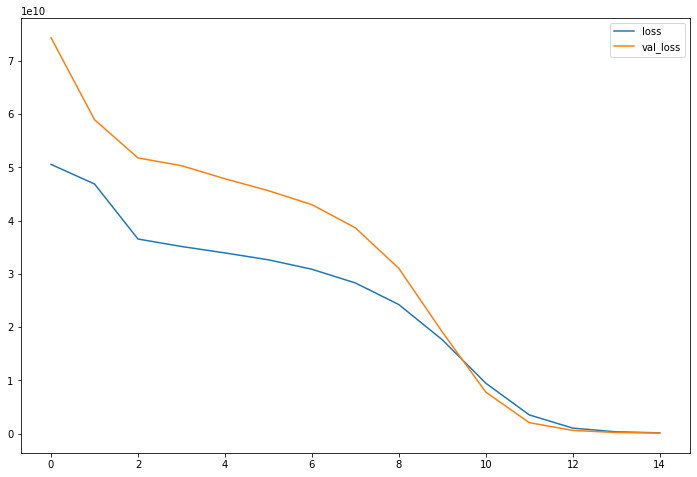

In [170]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12, 8))

In [171]:
pred = model.predict(X_test)

In [172]:
mean_squared_error(y_test, pred)**0.5

11290.438932614015

In [173]:
r2_score(y_test, pred)

0.9976556331252799